In [15]:
import glob
import os
from astropy.io import fits
import numpy as np

pathlist = glob.glob('/blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.1/s*')
geometry = [os.path.basename(path).split('/')[-1][:7] for path in pathlist]

b3fluxarr = np.array([]) ; b6b3fluxarr = np.array([])
logmassarr = np.array([])
for path in geometry:
    filepath = './'+path+'/flux_prop.fits'
    if not os.path.isfile(filepath):
        continue
    fluxfile = fits.open(filepath)
    cols = fluxfile[1].columns
    if not 'mass_los' in cols.names:
        continue
    print(path)
    

    b6flux = fluxfile[1].data['b6 flux'][:,3]*1e-3*(1/5.41)**2
    b3flux = fluxfile[1].data['b3 flux'][:,3]*1e-3*(1/5.41)**2
    
    
    
    masslos = fluxfile[1].data['temp_los'][:,3]
    logmass = np.log10(masslos)

    index = np.where((masslos>0)&(b6flux>0)&(b3flux>0)&(np.isnan(logmass)==False)&(np.isnan(b6flux)==False)&(np.isnan(b3flux)==False))[0]
    masslos = masslos[index]
    logmass = logmass[index]
    
    logb3flux = np.log10(b3flux[index]) 
    logb6b3flux = np.log10(b6flux[index]/b3flux[index])
    b3fluxarr = np.append(b3fluxarr, logb3flux)
    b6b3fluxarr = np.append(b6b3fluxarr, logb6b3flux)
    
    
    logmassarr = np.append(logmassarr, logmass)
    
b3fluxarr.flatten()
b6b3fluxarr.flatten()
logmassarr.flatten()
X = np.vstack((b3fluxarr, b6b3fluxarr)).T
y = logmassarr




s-pbsmi
s-p-hmi
spu-hmi


/scratch/local/62374029/ipykernel_786/2810017192.py:28: RuntimeWarning: invalid value encountered in log10
  logmass = np.log10(masslos)


spubsmi
s-pbhmi
s-u-smi
s-ubhmi
spu-smi
s-u-hmi
s-ubsmi
spubhmi
s-p-smi


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print(X_train, y_train)

[[-5.05475403  0.69724259]
 [-4.07317669  1.18118326]
 [-9.06155309  1.20867115]
 ...
 [-3.91100992  1.13675654]
 [-5.37617147  1.07838985]
 [-4.82449387  0.8507877 ]] [1.55654165 1.8014762  1.17719987 ... 2.61297304 1.37713349 1.08189228]


In [3]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=2000, max_depth=5, verbose=3,oob_score=True, n_jobs=-1)
model.fit(X_train, y_train)
model.score(X_test, y_test)

[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 2000


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


building tree 2 of 2000


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s


building tree 3 of 2000
building tree 4 of 2000
building tree 5 of 2000
building tree 6 of 2000
building tree 7 of 2000
building tree 8 of 2000
building tree 9 of 2000
building tree 10 of 2000
building tree 11 of 2000
building tree 12 of 2000
building tree 13 of 2000
building tree 14 of 2000
building tree 15 of 2000
building tree 16 of 2000
building tree 17 of 2000
building tree 18 of 2000
building tree 19 of 2000
building tree 20 of 2000
building tree 21 of 2000
building tree 22 of 2000
building tree 23 of 2000
building tree 24 of 2000
building tree 25 of 2000
building tree 26 of 2000
building tree 27 of 2000
building tree 28 of 2000
building tree 29 of 2000
building tree 30 of 2000
building tree 31 of 2000
building tree 32 of 2000
building tree 33 of 2000
building tree 34 of 2000
building tree 35 of 2000
building tree 36 of 2000
building tree 37 of 2000
building tree 38 of 2000
building tree 39 of 2000
building tree 40 of 2000
building tree 41 of 2000
building tree 42 of 2000
buildin

[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed: 20.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:   12.6s finished


0.233168457698402

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:   12.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[1.40130464 1.9536343  1.46139632 ... 1.46139632 1.38406719 1.62317996]
[1.13656604 2.1241028  1.37235847 ... 1.3974654  2.56054346 1.74782571]


[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:   12.3s finished


Text(0.5, 1.0, 'temp_los, n_estimator=2000, max_depth=5')

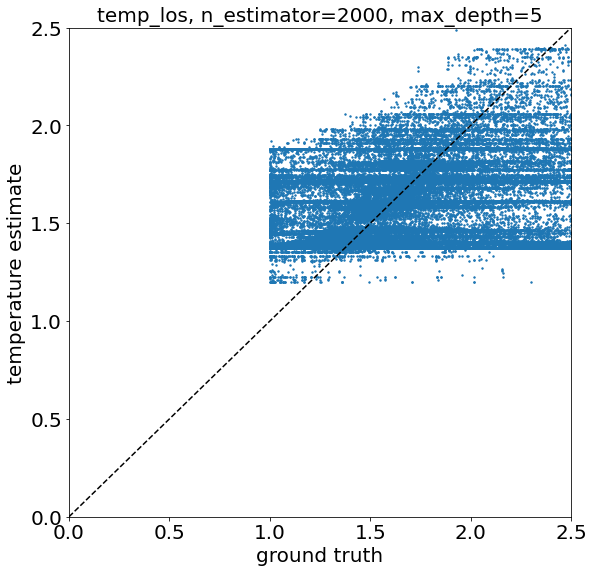

In [4]:
import matplotlib.pyplot as plt
print(model.predict(X_test))
print(y_test)
plt.rcParams['xtick.labelsize']=20
plt.rcParams['ytick.labelsize']=20
plt.rcParams['axes.titlesize']=20
plt.rcParams['axes.labelsize']=20

fig = plt.figure(figsize=(9,9))
plt.scatter(y_test, model.predict(X_test),s=2)
plt.plot([0,2.5],[0,2.5], c='k', ls='dashed')
plt.xlim(0,2.5)
plt.ylim(0,2.5)
plt.xlabel('ground truth')
plt.ylabel('temperature estimate')
plt.title('temp_los, n_estimator=2000, max_depth=5')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:    1.0s finished


(0.17609125905568124, 1.6989700043360187)

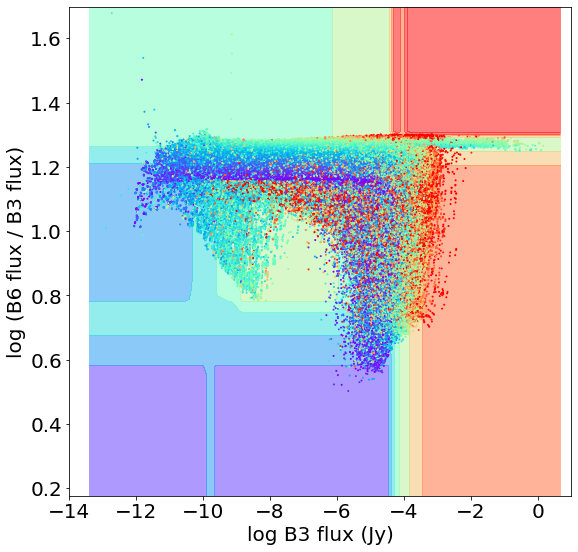

In [6]:
import matplotlib.pyplot as plt

def plot_decision_boundary(model, X, y, alpha=0.5, scatter=True,contour=True, marker=None, vmin=1,vmax=2.5):
    xx = np.linspace(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, 100)
    yy = np.linspace(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5, 100)

    XX, YY = np.meshgrid(xx, yy)
    Z = model.predict(np.c_[XX.ravel(), YY.ravel()])
    Z = Z.reshape(XX.shape)

    if contour:
        plt.contourf(XX, YY, Z, alpha=alpha, cmap=plt.get_cmap('rainbow'),vmin=vmin,vmax=vmax)
    if scatter:
        if marker == None:
            plt.scatter(X[:, 0], X[:, 1], c=y, s=1, cmap=plt.get_cmap('rainbow'),vmin=vmin,vmax=vmax)
        else:
            plt.scatterter(X[:, 0], X[:, 1], c=y, s=1, cmap=plt.get_cmap('rainbow'), marker=marker,vmin=vmin,vmax=vmax)
        
    plt.xlabel('log B3 flux (Jy)')
    plt.ylabel('log (B6 flux / B3 flux)')
    
fig= plt.figure(figsize=(9,9))   
plot_decision_boundary(model, X_train, y_train)
plt.xlim(-14,1)
plt.ylim(np.log10(1.5),np.log10(50))




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:    1.0s finished


(0.17609125905568124, 1.6989700043360187)

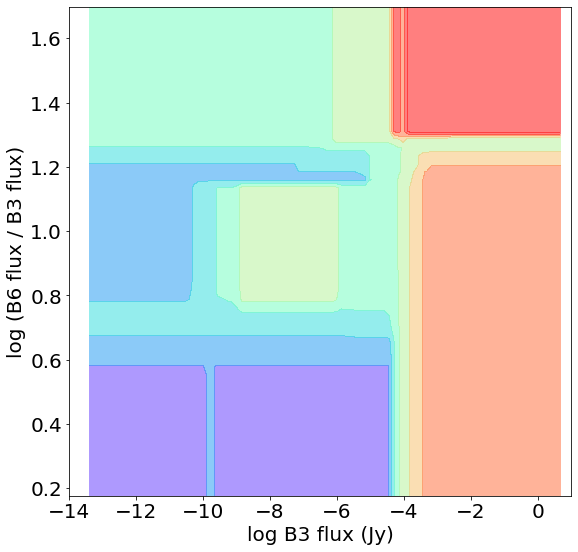

In [7]:

fig= plt.figure(figsize=(9,9))   
plot_decision_boundary(model, X_train, y_train,scatter=False)
plt.xlim(-14,1)
plt.ylim(np.log10(1.5),np.log10(50))




In [8]:
model2 = RandomForestRegressor(n_estimators=2000, max_depth=16, verbose=3,oob_score=True, n_jobs=-1)
model2.fit(X_train, y_train)
model2.score(X_test, y_test)

[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 2000


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


building tree 2 of 2000


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    3.2s remaining:    0.0s


building tree 3 of 2000
building tree 4 of 2000
building tree 5 of 2000
building tree 6 of 2000
building tree 7 of 2000
building tree 8 of 2000
building tree 9 of 2000
building tree 10 of 2000
building tree 11 of 2000
building tree 12 of 2000
building tree 13 of 2000
building tree 14 of 2000
building tree 15 of 2000
building tree 16 of 2000
building tree 17 of 2000
building tree 18 of 2000
building tree 19 of 2000
building tree 20 of 2000
building tree 21 of 2000
building tree 22 of 2000
building tree 23 of 2000
building tree 24 of 2000
building tree 25 of 2000
building tree 26 of 2000
building tree 27 of 2000
building tree 28 of 2000
building tree 29 of 2000
building tree 30 of 2000
building tree 31 of 2000
building tree 32 of 2000
building tree 33 of 2000
building tree 34 of 2000
building tree 35 of 2000
building tree 36 of 2000
building tree 37 of 2000
building tree 38 of 2000
building tree 39 of 2000
building tree 40 of 2000
building tree 41 of 2000
building tree 42 of 2000
buildin

[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed: 37.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:  1.2min finished


0.295146992780726

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:   43.9s finished


Text(0.5, 1.0, 'temp_los, n_estimator=2000, max_depth=16')

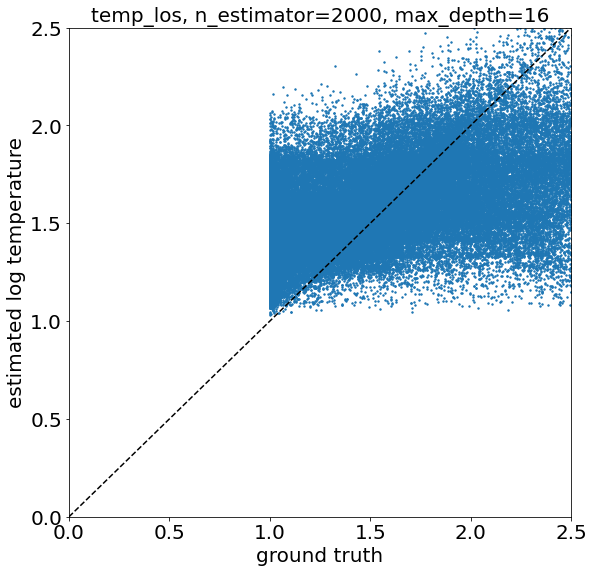

In [17]:


plt.rcParams['xtick.labelsize']=20
plt.rcParams['ytick.labelsize']=20
plt.rcParams['axes.titlesize']=20
plt.rcParams['axes.labelsize']=20

fig = plt.figure(figsize=(9,9))
plt.scatter(y_test, model2.predict(X_test),s=2)
plt.plot([0,2.5],[0,2.5], c='k', ls='dashed')
plt.xlim(0,2.5)
plt.ylim(0,2.5)
plt.xlabel('ground truth')
plt.ylabel('estimated log temperature')
plt.title('temp_los, n_estimator=2000, max_depth=16')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:    1.7s finished


(0.17609125905568124, 1.6989700043360187)

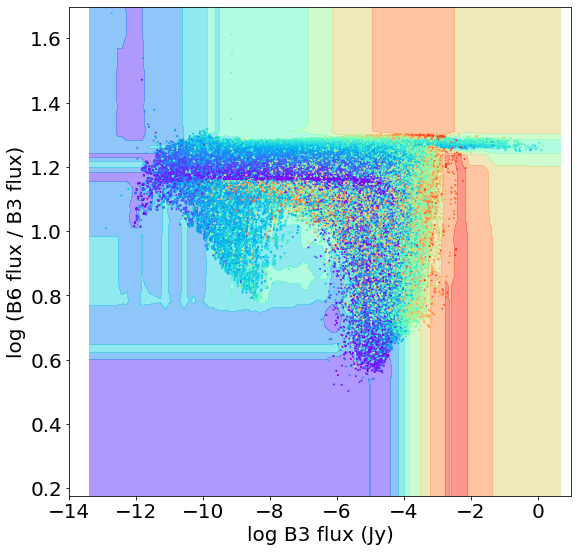

In [18]:
import matplotlib.pyplot as plt

def plot_decision_boundary(model, X, y, alpha=0.5, scatter=True,contour=True, marker=None, vmin=-6,vmax=2):
    xx = np.linspace(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, 100)
    yy = np.linspace(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5, 100)

    XX, YY = np.meshgrid(xx, yy)
    Z = model.predict(np.c_[XX.ravel(), YY.ravel()])
    Z = Z.reshape(XX.shape)

    if contour:
        plt.contourf(XX, YY, Z, alpha=alpha, cmap=plt.get_cmap('rainbow'),vmin=vmin,vmax=vmax)
    if scatter:
        if marker == None:
            plt.scatter(X[:, 0], X[:, 1], c=y, s=1, cmap=plt.get_cmap('rainbow'),vmin=vmin,vmax=vmax)
        else:
            plt.scatterter(X[:, 0], X[:, 1], c=y, s=1, cmap=plt.get_cmap('rainbow'), marker=marker,vmin=vmin,vmax=vmax)
        
    plt.xlabel('log B3 flux (Jy)')
    plt.ylabel('log (B6 flux / B3 flux)')
    
fig= plt.figure(figsize=(9,9))   
plot_decision_boundary(model2, X_train, y_train,vmin=1,vmax=3)
plt.xlim(-14,1)
plt.ylim(np.log10(1.5),np.log10(50))




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:    1.5s finished


(0.17609125905568124, 1.6989700043360187)

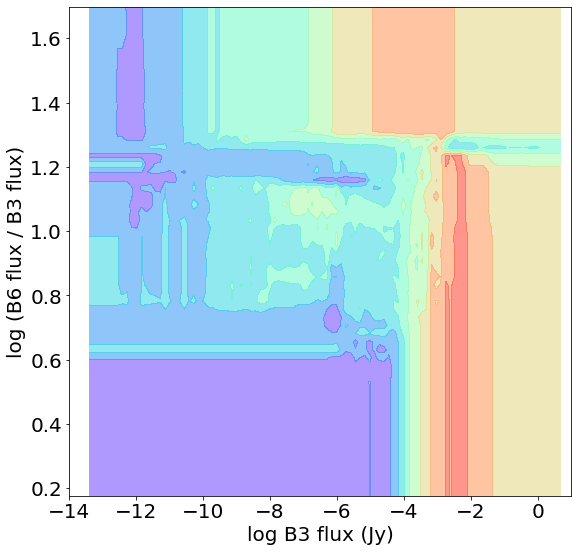

In [19]:

fig= plt.figure(figsize=(9,9))   
plot_decision_boundary(model2, X_train, y_train,scatter=False,vmin=1,vmax=3)
plt.xlim(-14,1)
plt.ylim(np.log10(1.5),np.log10(50))




In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV



X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
parameters = {'n_estimators': [500, 1000, 2000], 'max_depth': [3,4,5]}

grid_search = GridSearchCV(RandomForestRegressor(oob_score=True), parameters, cv=3,n_jobs=-1,return_train_score=True, verbose=3)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best model: {}".format(grid_search.best_estimator_))
print("Test score: {:.2f}".format(grid_search.score(X_test, y_test)))


Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END max_depth=3, n_estimators=500;, score=(train=0.902, test=0.901) total time= 1.3min
[CV 2/3] END max_depth=3, n_estimators=500;, score=(train=0.899, test=0.899) total time= 1.3min
[CV 3/3] END max_depth=3, n_estimators=500;, score=(train=0.903, test=0.902) total time= 1.3min
[CV 1/3] END max_depth=3, n_estimators=1000;, score=(train=0.901, test=0.901) total time= 2.5min



KeyboardInterrupt



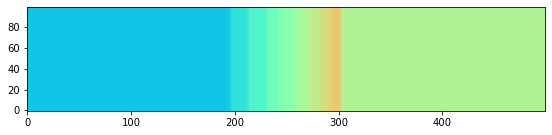

In [26]:
fig = plt.figure(figsize=(9,9))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.imshow(ypredict_2d, origin='lower', cmap=plt.get_cmap('rainbow'), vmin=-6,vmax=2)